# Merton's optimal portfolio problem 

In 1969, Robert C. Merton wanted to answer a simple problem: Given a stochastic stock, a risk-free fixed-income security, and a reasonable consumption utility function, how much should an investor allocate to both assets, and how much should she consume?

I became interested in the problem when it was mentioned in an Economist podcast on optimising investment strategies for happiness. I recognised it as a stochastic optimisation problem — a topic I have some experience with — and something applicable to my own financial decisions. If the optimum investment strategy for a given utility is solvable, why isn’t the optimal portfolio the first tool wealth managers reach for? More on this later.

Beyond being mathematically interesting and personally relevant, the optimal portfolio problem raises questions about who can actually effectuate optimal strategies. Simulations I ran suggest that constant consumption strategies carry surprisingly high risk of bankruptcy. Even with relatively large starting wealth, the stochastic shocks can drive wealth to zero, despite positive expected returns.

For low-income agents, fixed living costs (rent, food, transportation) form a significant proportion of consumption, making these stochastic effects especially important. These simulations highlight the importance of taylored investment strategies. These observations motivate analyzing bankruptcy risk alongside expected utility as a measure of strategy success.

## Problem Setup

The setup for the problem makes a few more assumptions in order to make it tractable. 

1) assets can be modelled as log-normal (Geometric Brownian Motion assumption) 
2) Markets are frictionless (no bid-ask spreads, no transaction fees)
3) Continuous trading is allowed and securities are infinitely divisible
4) Complete market

For now we will accept these simplifications. (Although, Frictionless markets are particularly painful from a realism perspective.)

<!-- The CRRA make sense for modelling consumption and investment patterns as it implies that capital allocation decisions are scale neutral (loosely risk aversion is understood in percentage of total wealth). The assumption might falter when considering the function class from a marginal utility perspective (the marginal utility of a 50% increase in wealth might be more important when poor than when rich) but we will leave those considerations for the discussion. -->

### Wealth Process

The wealth process can be derived by considering a suitable limit of a discrete wealth allocation problem. Merton (1971) provides a nice summary. 

In this discussion we consider the two asset problem (it turns out that this can be done without loss of generality see Merton (1971)). We have a risk-free asset with rate of return $r$ and a risky asset whose price, $S(t)$, is determined by a log-normal stochastic process.

$$S(t) = \mu S(t)dt + \sigma S(t)dB(t)$$

The agent has total wealth, $W(t)$ equal to the sum of their current investments in the risky and risk-free assets. They are responsible for a two-dimensional control variable 
$(N(W(t),t), c(W(t),t)) \equiv (N_t,c_t)$. 
$N$ is the amount of money they want to invest in the risky asset at a given time ($W_t-N_tS_t$ is thus invested in the risk-free asset) and $c$ is their rate of consumption. The wealth dynamics are thus: 

$$ 
\begin{align*}

dW_t &= (W_t - N_tS_t)rdt + N_tdS_t - c_tdt \\
&= [(W_t - N_tS_t)r -c_t]dt + N_t(\mu S_tdt + \sigma S_tdB_t)
\end{align*}
$$

We then introduce a new variable to reduce the dimensionality of the SDE 

$$\pi(W(t),t) := \frac{S(t)N(W(t),t)}{W(t)}$$

is the proportion of the agent's wealth she decides to invest in the risky asset. Substituting this new variable (which also replaces $N$ as one of the control variables) yields the familiar wealth process.

$$ W_t = [(r + \pi_t(\mu - r))W_t-c_t]dt + W_t\pi_t\sigma dB_t \quad t\in(t_0,T)$$

### Objective function

Our agent wishes to optimise the her consumption over her entire lifetime. She may also place importance on money remaining when she dies. 

The second consideration may be encoded in the average value of a bequest function $\mathbb{E}[B(W(T),T)]$

The first may be encoded as the expected value of her consumption over her whole life (remember that in principle consumption is a function of the wealth process and is thus stochastic).

$$\mathbb{E}\left[\int_{t0}^T c_t dt\right]$$ 

This is a good start, but there are a few nuances. Consumption now is more valuable than consumption later — having a house today is better than having it a year from now, as you can enjoy it longer. To account for this, we discount utility according to time preference using an exponential factor $e^{-\rho t}$, where $\rho$ is a subjective discount rate.

Utility theory also captures risk aversion and diminishing marginal utility: upgrading from walking to biking provides more enjoyment than upgrading from a commuter bike to a fancy road bike, even if the price difference is similar. We encode this into a utility function $U(c)$.

Mathematically, we want to average utility over the entire consumption path, leading to the familiar objective function:

$$V(w,t) = sup_{(\pi_t,c_t)}\mathbb{E}\left[\int_{t}^T e^{-\rho (s-t)}U(c_s,s)ds + B(W_T,T) \middle| W_t = w\right]$$

## Stochastic Optimal Control

Merton (1969, 1971) originally solved the optimal portfolio problem using the calculus of variations and Pontryagin’s Maximum Principle rather than the Hamilton-Jacobi-Bellman equation. Here, I present the HJB formulation as an alternative perspective that is widely used in stochastic control theory and naturally generalises to numerical solutions and more complex settings.

### Hamilton-Jacobi-Bellman PDE

The Bellman Principle of dynamic programming states a rather intuitive fact that "An optimal policy has the property that, no matter what the initial state and initial decision are, the remaining decisions must constitute an optimal policy with respect to the state resulting from the first decision." (Bellman 1953). We may use the principle to derive the Hamilton-Jacobi-Bellman equation: a PDE that characterises an optimal control.

$$
V(w,t) = sup_{(\pi_t,c_t)}\mathbb{E}_t\left[\int_{t}^{t+h}e^{-\rho s}U(c_s,s)ds + V(W_{t+h},t+h) \middle| W_t=w\right]
$$ (1)

Applying ito's lemma $V(W_{t+h},t+h)-V(w,t)$ yields

$$V(W_{t+h},t+h)-V(w,t) = \int_t^{t+h}A^uV(W_s,s) ds + \int_t^{t+h}\partial_wV(W_s,s) W_s\pi_s\sigma dB_s$$

Where $A^u$ is the backward operator $$A^uV(w,t) \equiv \partial_tV(w,t) + \partial_wV(w,t)\cdot(r + \pi_t(\mu-r)w - c_t) + \frac{1}{2}\partial_{ww}V(w,t)w^2\pi_t^2\sigma^2$$

The last term is a martingale and so evaluates to 0 upon taking expectations. With this in mind, we can divide (1) by $h$, take limits, and expand $A^u$ to yield Hamilton-Jacobi-Bellman PDE:
$$
0 = \sup_{(\pi,c)} \left\{ \partial_tV(w,t) + \partial_wV(w,t)\cdot(r + \pi_t(\mu-r)w - c_t) + \frac{1}{2}\partial_{ww}V(w,t)w^2\pi_t^2\sigma^2 + e^{-\rho t}u(c_t) \right\}
$$

Or definining the Hamiltonian we retrieve the familiar form of the HJB equation.

$$-\mathcal{H}(w, t, \partial_{w}V, \partial_{ww}V) := \sup_{(\pi_t,c_t)}\left\{\partial_wV(w,t)\cdot(r + \pi_t(\mu-r)w - c_t) + \frac{1}{2}\partial_{ww}V(w,t)w^2\pi_t^2\sigma^2 + e^{-\rho t}u(c_t) \right\}$$
$$-\partial_tV(w,t) + \mathcal{H}(w, t, \partial_{w}V, \partial_{ww}V) = 0$$

In [54]:
import numpy as np 
import matplotlib.pyplot as plt 

#for reproducibility 
rng = np.random.default_rng(seed=200)

def euler_maruyama(r, mu, sigma, N, T, pi, c, W_0):
    #initialising the wealth array
    W = np.empty(N+1)
    W[0] = W_0
    W_t = W_0 
    t = 0
    dt = T/N
    norm = np.random.normal(0, np.sqrt(dt), N)

    #recursive logic 
    for i in range(N):
        pi_t = pi(W_t, t)
        c_t = c(W_t, t)
        W_t = W_t + ((r + pi_t*(mu - r))*W_t - c_t)*dt + W_t*pi_t*sigma*norm[i]
        W[i+1] = W_t
        t = t + dt
    
    return W

With the above function we may simulate wealth paths for different strategies. Below we do this for the naive constant consumption while investing a constant proportion of our wealth. 

We will need to pick a reasonable timeline and some constants. Our units are £, £/year, or %/year.

Let's say we start investing when we are 20 and stop consuming (die) when we are 100. Let the risk-free asset appreciate by 3% annually and the mean rate of return be 5% annually. 20% is a reasonable volatility for now. We made it big on the Gamestop meme trade and have a decent bit of capital to work with: £100,000.

We live in a backwater hovel, commute into work on an old bike and love beans on toast. Our annual consumption remains a constant £4000. We're young yet and pretty bullish so we decide to invest 80% of our wealth at any given time in the stock market and 20% in fixed-income. 

Let's see how well we fare.

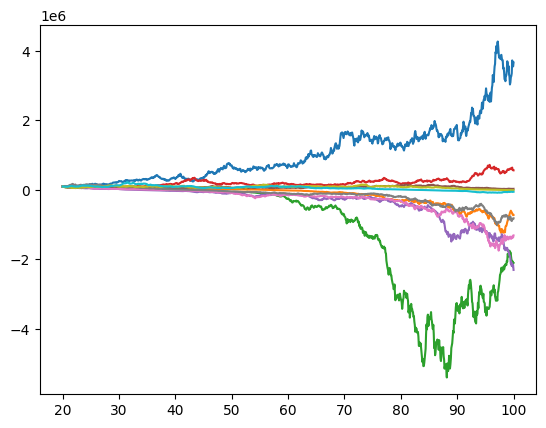

In [57]:
#basic simulation 
#constants 
r = 0.03 
mu = 0.05 
sigma = 0.2
N = 1000 
T = 80
W_0 = 100000

pi = lambda w,t : 0.8
c = lambda w, t : 4000

for i in range(10): 
    W = euler_maruyama(r, mu, sigma, N, T, pi, c, W_0)
    plt.plot(np.linspace(20,T+20,N+1),W)

plt.show()

With this consumption strategy the agent sometimes goes into debt and starts short selling the statistically lucrative stock. In order to prevent this perverse trade we will cap spending at W_t. 

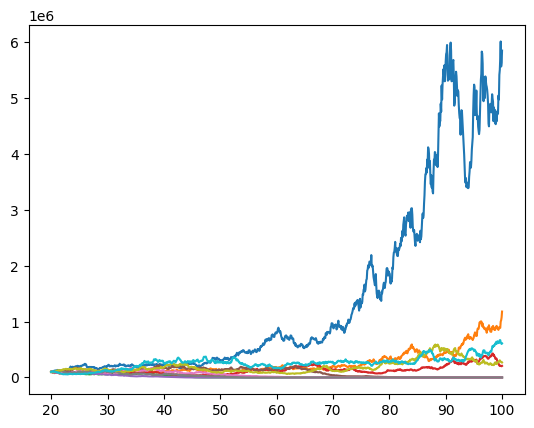

In [58]:
c = lambda w,t : np.min([4000, w])
for i in range(10): 
    W = euler_maruyama(r, mu, sigma, N, T, pi, c, W_0)
    plt.plot(np.linspace(20,T+20,N+1),W)

plt.show()

Clearly the consumption strategy isn't particularly successful. Given that the risky asset returns 5% annually (1% of starting wealth above our consumption) and the risk-free asset returns 3% annually (1% of starting wealth below our consumption) we might expect a good strategy to aim for expected returns equal to consumption.

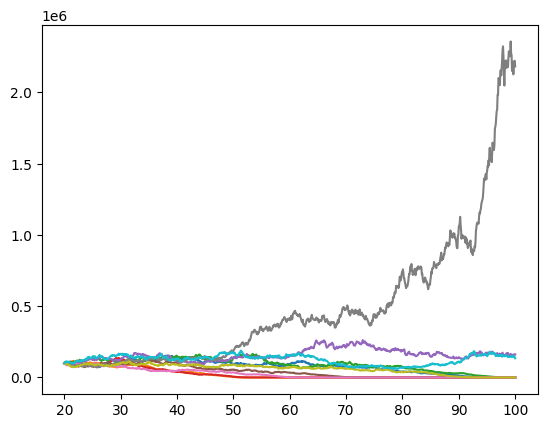

In [52]:
pi = lambda w,t: 0.5
for i in range(10): 
    W = euler_maruyama(r, mu, sigma, N, T, pi, c, W_0)
    plt.plot(np.linspace(20,T+20,N+1),W)

plt.show()

There are still a large number of bankrupcies. Stochastic fluctuations of the risky asset alone are sufficient to drive wealth trajectories down.

Finally, we try the classic 60/40 strategy many advisors advocate.

The findings are similar. 

### Conclusion
These simulations demonstrate that constant absolute consumption strategies are highly sensitive to stochastic fluctuations, even when the expected portfolio return meets or slightly exceeds the level of consumption. Increasing the allocation to the risky asset (e.g., from 50/50 to 60/40) increases both the expected drift and the volatility, which broadens the distribution of outcomes: some wealth trajectories grow substantially, while others quickly deplete to near zero. This effect is particularly concerning for low-wealth or marginalized households, for whom fixed consumption needs (such as rent, food, and healthcare) cannot easily be reduced. In such cases, even a portfolio with a positive expected return is not sufficient to prevent bankruptcy, highlighting the critical role of stochastic risk and the limitations of absolute consumption strategies for vulnerable populations.